# 使用教學
1. Run all  
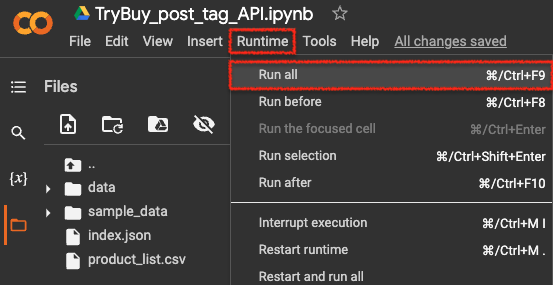

2. 將新產生的網址 "XXX.ngrok-free.app"，複製到下方 ngrok_app 中  
由於套用免費 server，每次重啟都會替換網址，若想付費升級：可參考 [ngrok](https://dashboard.ngrok.com/get-started/your-authtoken)
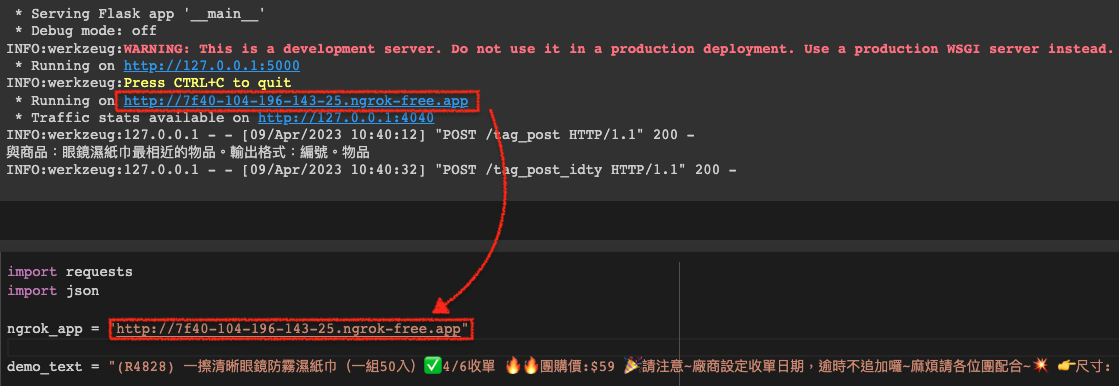

3. 透過 python 或其他 HTTP POST request 發送貼文、收貼標結果
  
4. 可依需求改變 http://XXX.ngrok-free.app<mark>`/參數`</mark>，達到不同效果

In [ ]:
# install requirement
!pip install flask-ngrok2
!pip install pyngrok

# # register ngrok_auth_token from: https://dashboard.ngrok.com/get-started/setup
ngrok_auth_token = ""

In [ ]:
from flask_ngrok2 import run_with_ngrok
from flask import request, Flask
import json

app = Flask(__name__)
run_with_ngrok(app=app, auth_token=ngrok_auth_token)

# set methods=['GET','POST'] to prevent 'HTTP 405 Method Not Allowed'
@app.route("/", methods=['GET','POST'])
def home():
  return "Hello World"

@app.route("/test", methods=['GET','POST'])
def test(): # repeat same input
  input = json.loads(request.data)['text']
  return input

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://60c8-34-42-98-246.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [22/Aug/2024 13:08:01] "POST /test HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2024 13:08:16] "POST / HTTP/1.1" 200 -


In [ ]:
##################################################
##  注意，此處程式為 Client 需在他處(ex:local)執行   ##
##################################################
import requests
import json

ngrok_app = "http://60c8-34-42-98-246.ngrok-free.app" # 更新 XXX.ngrok-free.app

demo_text = "實驗用文字，確保可以傳輸中文～"

url = ngrok_app + '/'
# url = ngrok_app + '/test'

r = requests.post(
    url=url,
    json={"text": demo_text},
)
r.encoding = "utf_8" # other encoding: utf_8 utf_16 gbk gb18030 big5hkscs
requests = r.text
print(requests)

Hello World


In [ ]:
##################################################
##  注意，此處程式為 Client 需在他處(ex:local)執行   ##
##################################################
import requests
import json

ngrok_app = "http://60c8-34-42-98-246.ngrok-free.app" # 更新 XXX.ngrok-free.app

demo_text = "實驗用文字，確保可以傳輸中文～"

# url = ngrok_app + '/'
url = ngrok_app + '/test'

r = requests.post(
    url=url,
    json={"text": demo_text},
)
r.encoding = "utf_8" # other encoding: utf_8 utf_16 gbk gb18030 big5hkscs
requests = r.text
print(requests)

實驗用文字，確保可以傳輸中文～
